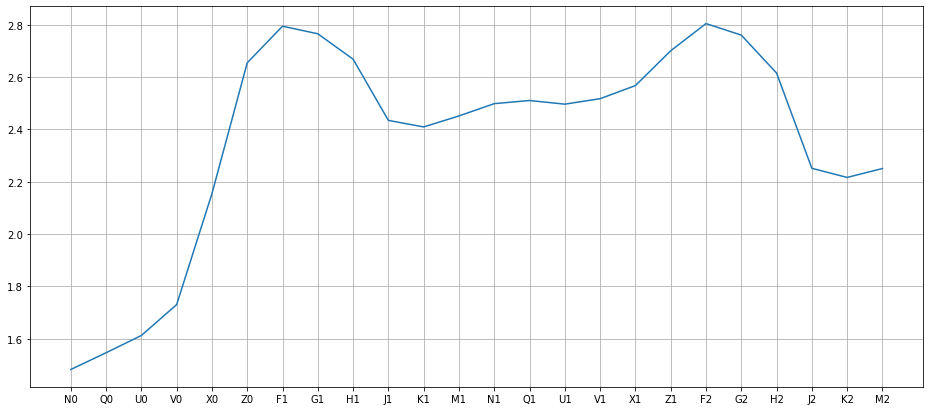

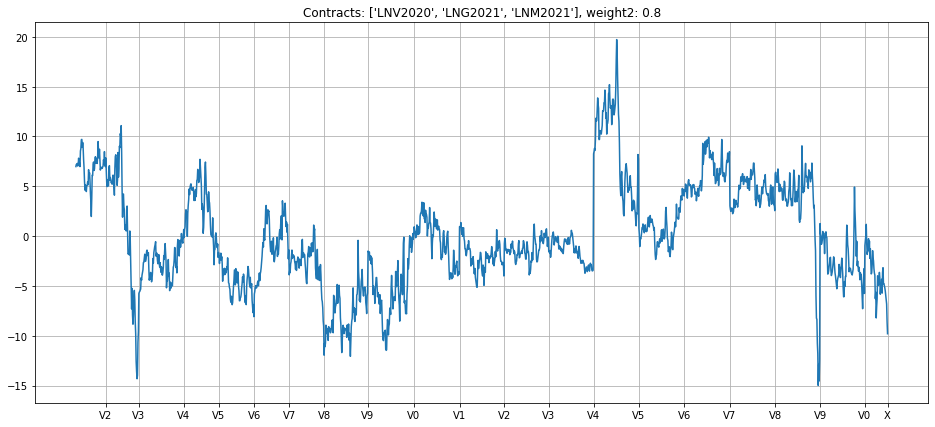

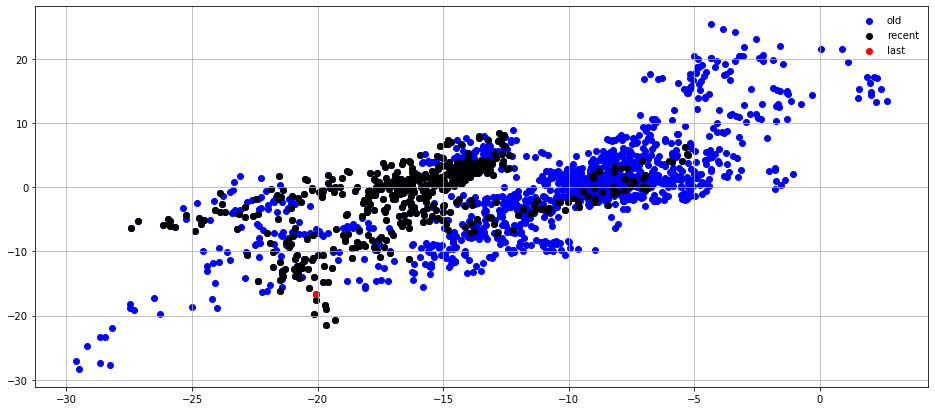

In [1]:

import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()

%matplotlib inline
import futures_charts.futures_curve as fc
fc.get_futures_curve_chart_4date(ticker_head='NG',settle_date=report_date,tr_dte_limit=600)  # 600

no = 6

#aggregation_method, contracts_back
bf_signals_output = fc.get_butterfly_panel_plot(report_date=report_date,id=no)   # 315 so much to clean!!!
bf_signals_output = fc.get_butterfly_scatter_plot(report_date=report_date,id=no)





In [4]:
import opportunity_constructs.intraday_calculations as ic
ic.get_intraday_vcs(id=475,atm_vol_ratio=1.148)

{'ticker1': 'LCZ2020', 'ticker2': 'LCG2021', 'Q': 96, 'Q1': 77, 'validQ': True}

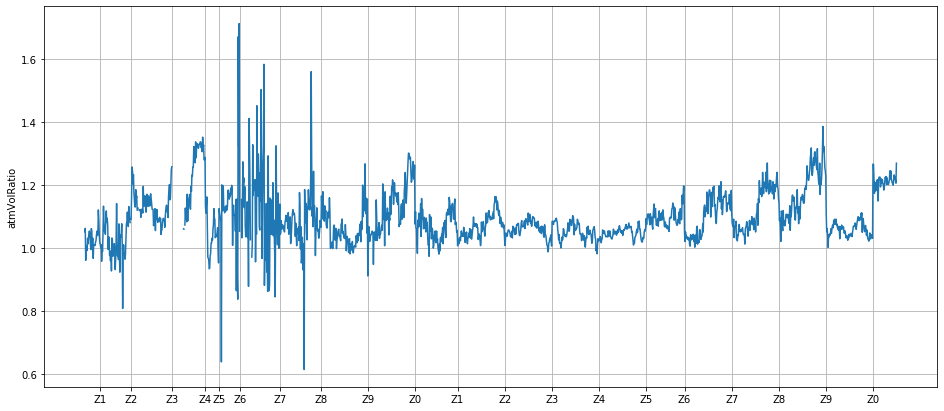

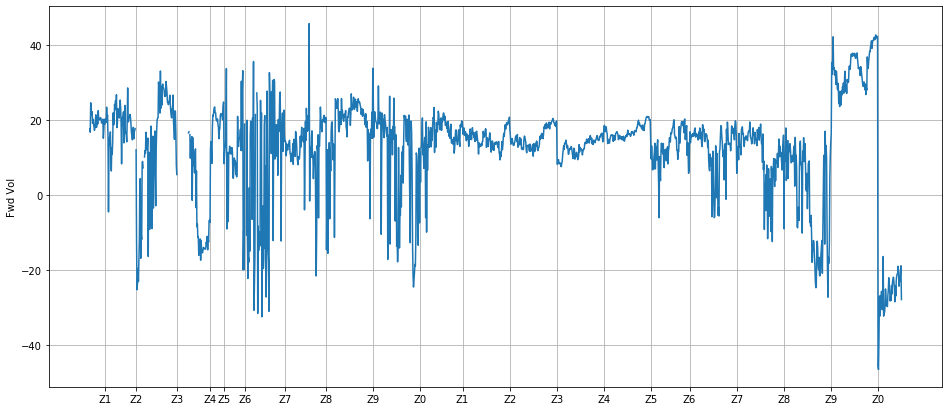

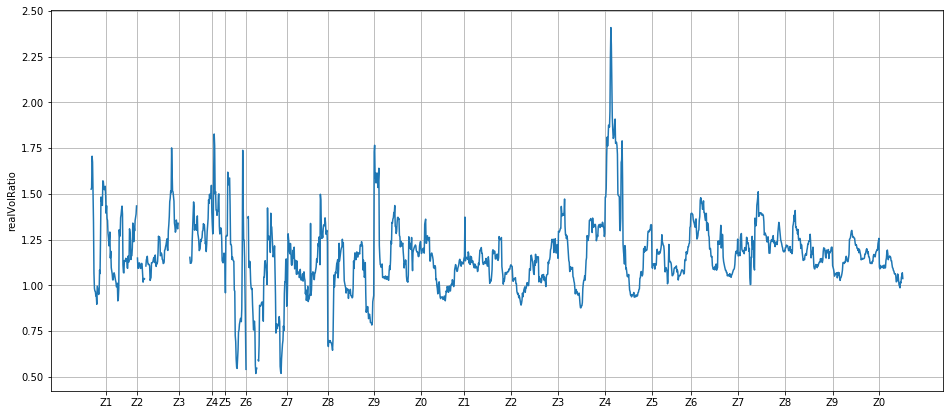

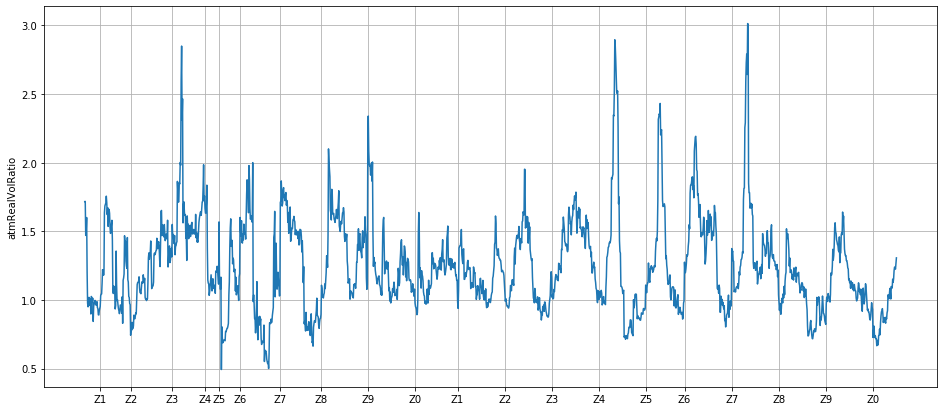

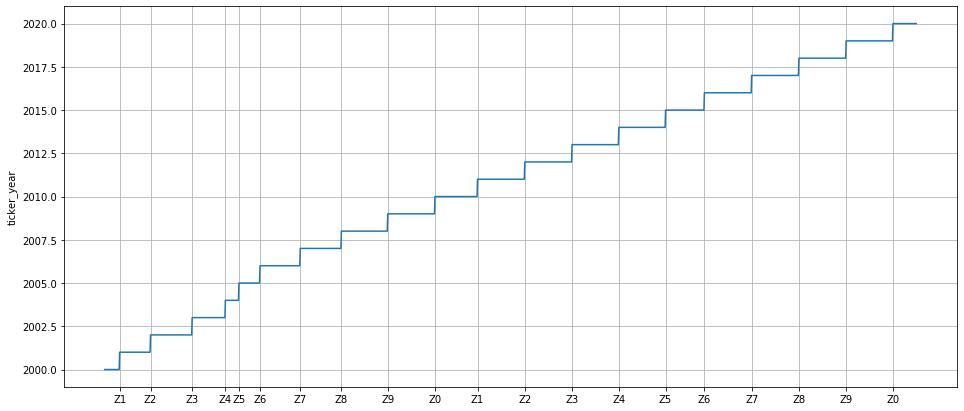

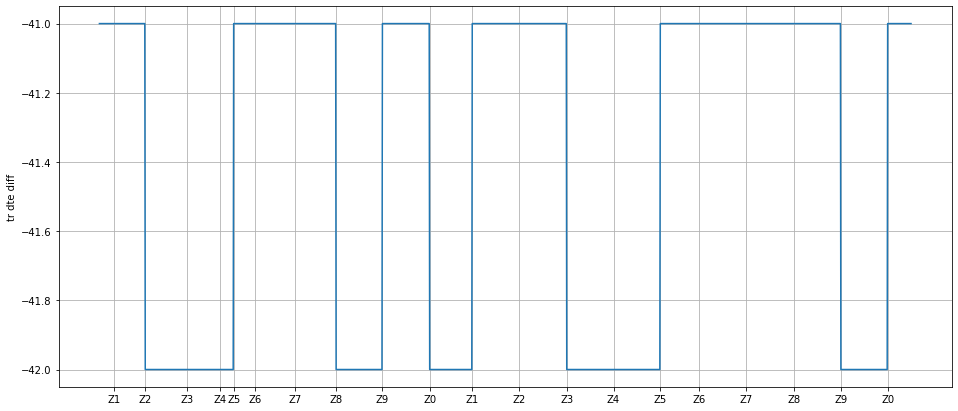

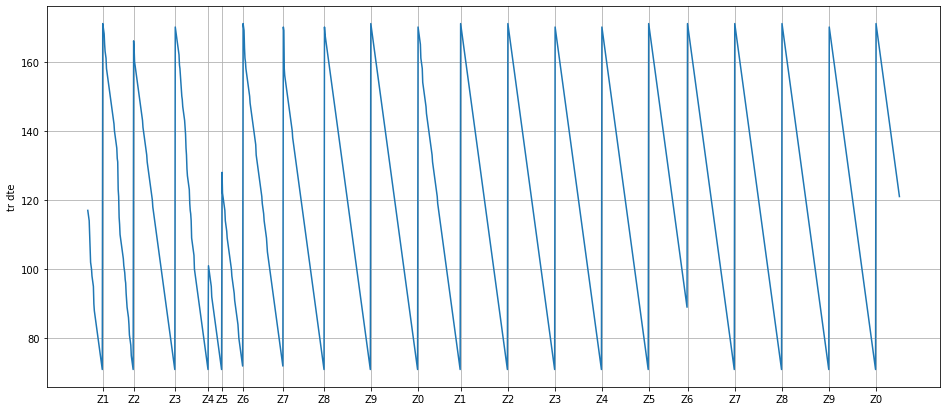

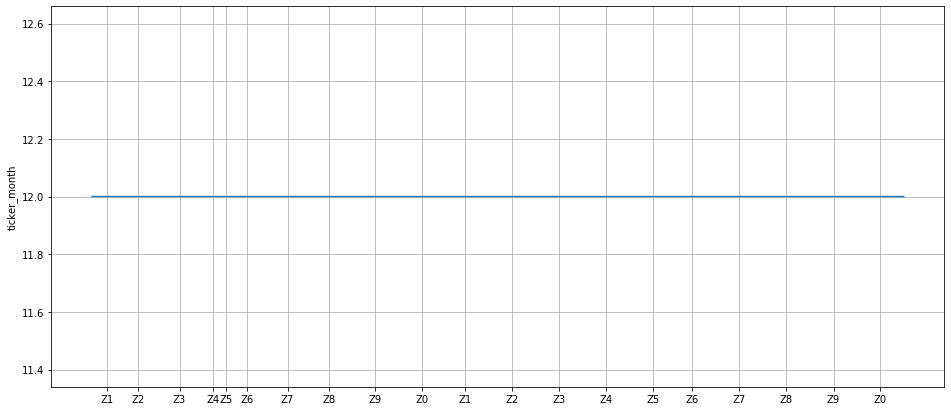

In [3]:
import futures_charts.options_curve as ocr
%matplotlib inline
ocr.get_vcs_panel_plot(ticker_list=['LNZ2020','LNG2021'],report_date = 20200623,diagnostics_q=True)

In [5]:
import opportunity_constructs.spread_carry as sc
import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()

#Carry Spread Bet Size: 4023
spread_carry_output = sc.generate_spread_carry_sheet_4date(report_date=report_date)
spread_report = spread_carry_output['spread_report']
ticker_head_list = list(spread_report['tickerHead'].unique())
# Compare BO and S sizing



#spread_report = spread_report[spread_report['tickerHead']==ticker_head_list[19]]
spread_report = spread_report[['ticker1','ticker2','tickerHead','front_tr_dte','carry','q_carry','reward_risk','price','q','upside','downside']]
spread_report
spread_report[spread_report['tickerHead']=='NG']



,ticker1,ticker2,tickerHead,front_tr_dte,carry,q_carry,reward_risk,price,q,upside,downside
0,NGQ2020,NGU2020,NG,23.0,NaN,NaN,NaN,-0.066,1,154.0,-137.0
1,NGU2020,NGV2020,NG,44.0,520.0,0.0,0.75,-0.118,1,145.0,-166.0
2,NGV2020,NGX2020,NG,65.0,3060.0,0.0,2.05,-0.424,1,256.0,-355.0
3,NGX2020,NGZ2020,NG,87.0,760.0,0.0,0.47,-0.500,1,257.0,-367.0
4,NGZ2020,NGF2021,NG,107.0,-3600.0,-5.0,-8.65,-0.140,6,104.0,-122.0
5,NGF2021,NGG2021,NG,129.0,-1690.0,-68.0,-6.40,0.029,74,60.0,-82.0
6,NGG2021,NGH2021,NG,148.0,-680.0,-9.0,-1.49,0.097,83,120.0,-175.0
7,NGH2021,NGJ2021,NG,167.0,-1370.0,29.0,-0.80,0.234,54,452.0,-784.0
8,NGJ2021,NGK2021,NG,190.0,2090.0,0.0,3.63,0.025,54,107.0,-125.0
9,NGK2021,NGM2021,NG,211.0,670.0,50.0,2.28,-0.042,4,60.0,-70.0


In [26]:
import pandas as pd
import numpy as np
import get_price.presave_price as psp
dirty_data_points = psp.dirty_data_points
data4_tickerhead = pd.merge(data4_tickerhead, dirty_data_points, on=['settle_date', 'ticker'],how='left')
data4_tickerhead_filtered = data4_tickerhead[data4_tickerhead['discard'] !=True]

In [29]:
data4_tickerhead_filtered[(data4_tickerhead_filtered['settle_date']==dirty_data_points['settle_date'][0])&
                 (data4_tickerhead_filtered['ticker']==dirty_data_points['ticker'][0])]

,settle_date,ticker,ticker_head,ticker_month,ticker_year,cal_dte,tr_dte,close_price,volume,discard


In [1]:
import ta.strategy_followup as sf
import ta.strategy_greeks as sg
import pandas as pd
#sf.get_results_4strategy(alias='ECV16Z16VCS')

greeks_out = sg.get_greeks_4strategy_4date(alias='ECV16Z16VCS', as_of_date=20160715)

greeks_out['ticker_portfolio']

,ticker,total_oev,theta
0,ECV2016,70.000010,-921.85625
1,ECZ2016,-70.000001,744.27500


In [5]:
import get_price.get_options_price as gop
skew_output = gop.get_options_price_from_db(ticker='ECZ2016',
                                                    settle_date=20160715,
                                                    column_names=['option_type', 'strike', 'theta', 'vega', 'delta'])

skew_output

,option_type,strike,theta,vega,delta
0,C,0.900,-0.000004,0.016428,0.988447
1,C,0.920,-0.000009,0.026095,0.982428
2,C,0.930,-0.000010,0.030512,0.979510
3,C,0.965,-0.000020,0.053314,0.962972
4,C,0.970,-0.000021,0.056950,0.960119
5,C,0.975,-0.000024,0.063058,0.955198
6,C,0.980,-0.000026,0.069013,0.950244
7,C,0.985,-0.000027,0.072730,0.947073
8,C,0.990,-0.000030,0.080699,0.940070
9,C,0.995,-0.000032,0.086482,0.934813
